In [2]:
# Install pip packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install ipywidgets

In [105]:
# Import libraries for data cleaning, preprocessing, and manipulation
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
# Read dataset into program
dataFrame = pd.read_csv("retail_store_inventory.csv")

In [107]:
# Generate info on the dataframe columns, null values, and data types
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [108]:
# Check columns for any incomplete or missing (N/A) values
dataFrame.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [109]:
# Gather list of columns for visual list to decide which to keep and which to drop
dataFrame.head()
dataFrameColumnList = list(dataFrame.columns)
dataFrameColumnList

['Date',
 'Store ID',
 'Product ID',
 'Category',
 'Region',
 'Inventory Level',
 'Units Sold',
 'Units Ordered',
 'Demand Forecast',
 'Price',
 'Discount',
 'Weather Condition',
 'Holiday/Promotion',
 'Competitor Pricing',
 'Seasonality']

In [110]:
# Begin analyzing columns important to linear regression or to drop

In [111]:
# In this prpoject, we are creating demand forecast, so precalculated [Demand Forecast] is unnecessary
dataFrame.drop("Demand Forecast", axis=1, inplace=True)

In [112]:
# Convert [Date] column from string to datetime and extract day, month, year for usability
dataFrame["Date"] = pd.to_datetime(dataFrame["Date"])
dataFrame["Day"] = dataFrame["Date"].dt.day
dataFrame["Month"] = dataFrame["Date"].dt.month
dataFrame["Year"] = dataFrame["Date"].dt.year
dataFrame

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Day,Month,Year
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,33.50,20,Rainy,0,29.69,Autumn,1,1,2022
1,2022-01-01,S001,P0002,Toys,South,204,150,66,63.01,20,Sunny,0,66.16,Autumn,1,1,2022
2,2022-01-01,S001,P0003,Toys,West,102,65,51,27.99,10,Sunny,1,31.32,Summer,1,1,2022
3,2022-01-01,S001,P0004,Toys,North,469,61,164,32.72,10,Cloudy,1,34.74,Autumn,1,1,2022
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,73.64,0,Sunny,0,68.95,Summer,1,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,73.73,20,Snowy,0,72.45,Winter,1,1,2024
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,82.57,10,Cloudy,0,83.78,Autumn,1,1,2024
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,11.11,10,Rainy,0,10.91,Winter,1,1,2024
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,53.14,20,Rainy,0,55.80,Spring,1,1,2024


In [113]:
# Drop [Date] column
dataFrame.drop("Date", axis=1, inplace=True)

In [114]:
# Describe key statistical values (DESCRIPTIVE METHOD) of the dataframe for analysis prior to building model
# Linear Regression is focused on relative relationship of features and does not require standardization
dataFrame.describe()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Day,Month,Year
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,55.135108,10.009508,0.497305,55.146077,15.700410,6.518468,2022.502052
std,129.949514,108.919406,52.277448,26.021945,7.083746,0.499996,26.191408,8.807111,3.451564,0.502728
min,50.000000,0.000000,20.000000,10.000000,0.000000,0.000000,5.030000,1.000000,1.000000,2022.000000
25%,162.000000,49.000000,65.000000,32.650000,5.000000,0.000000,32.680000,8.000000,4.000000,2022.000000
50%,273.000000,107.000000,110.000000,55.050000,10.000000,0.000000,55.010000,16.000000,7.000000,2023.000000
75%,387.000000,203.000000,155.000000,77.860000,15.000000,1.000000,77.820000,23.000000,10.000000,2023.000000
max,500.000000,499.000000,200.000000,100.000000,20.000000,1.000000,104.940000,31.000000,12.000000,2024.000000


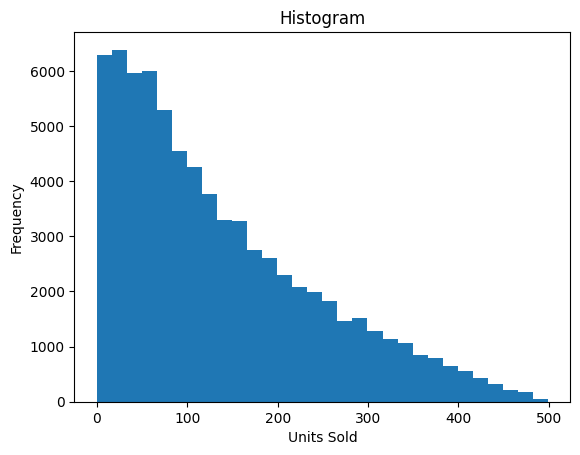

In [115]:
# Create a histogram visualization for unit sales data
plt.hist(dataFrame["Units Sold"], bins=30)
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

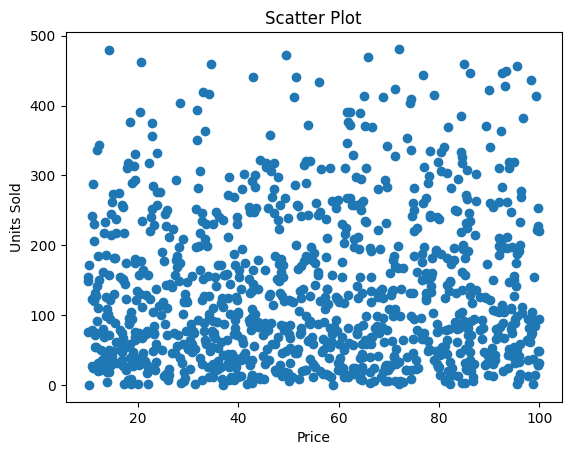

In [116]:
# Create a scatterplot visualization for unit sales data (seed 42 for reproducability)
# There is no clear connection between the price variable and its impact on sales thusfar
x = dataFrame["Price"].sample(n=1000, random_state=42)
y = dataFrame["Units Sold"].sample(n=1000, random_state=42)

plt.scatter(x, y)

# Add labels and title
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.title('Scatter Plot')

# Display the plot
plt.show()

In [117]:
# Strip [Store ID] of Alpha and leading 0s, then cast to int for use in dataframe and heatmap
print(type(dataFrame["Store ID"]))
dataFrame["Store ID"] = dataFrame["Store ID"].str[1:]
dataFrame["Store ID"] = dataFrame["Store ID"].str.lstrip("0")
dataFrame["Store ID"] = dataFrame["Store ID"].astype(int)
dataFrame

<class 'pandas.core.series.Series'>


,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Day,Month,Year
0,1,P0001,Groceries,North,231,127,55,33.50,20,Rainy,0,29.69,Autumn,1,1,2022
1,1,P0002,Toys,South,204,150,66,63.01,20,Sunny,0,66.16,Autumn,1,1,2022
2,1,P0003,Toys,West,102,65,51,27.99,10,Sunny,1,31.32,Summer,1,1,2022
3,1,P0004,Toys,North,469,61,164,32.72,10,Cloudy,1,34.74,Autumn,1,1,2022
4,1,P0005,Electronics,East,166,14,135,73.64,0,Sunny,0,68.95,Summer,1,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,5,P0016,Furniture,East,96,8,127,73.73,20,Snowy,0,72.45,Winter,1,1,2024
73096,5,P0017,Toys,North,313,51,101,82.57,10,Cloudy,0,83.78,Autumn,1,1,2024
73097,5,P0018,Clothing,West,278,36,151,11.11,10,Rainy,0,10.91,Winter,1,1,2024
73098,5,P0019,Toys,East,374,264,21,53.14,20,Rainy,0,55.80,Spring,1,1,2024


In [118]:
# Strip [Product ID] of Alpha and leading 0s, then cast to int for use in dataframe and heatmap
print(type(dataFrame["Store ID"]))
dataFrame["Product ID"] = dataFrame["Product ID"].str[1:]
dataFrame["Product ID"] = dataFrame["Product ID"].str.lstrip("0")
dataFrame["Product ID"] = dataFrame["Product ID"].astype(int)
dataFrame

<class 'pandas.core.series.Series'>


,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Day,Month,Year
0,1,1,Groceries,North,231,127,55,33.50,20,Rainy,0,29.69,Autumn,1,1,2022
1,1,2,Toys,South,204,150,66,63.01,20,Sunny,0,66.16,Autumn,1,1,2022
2,1,3,Toys,West,102,65,51,27.99,10,Sunny,1,31.32,Summer,1,1,2022
3,1,4,Toys,North,469,61,164,32.72,10,Cloudy,1,34.74,Autumn,1,1,2022
4,1,5,Electronics,East,166,14,135,73.64,0,Sunny,0,68.95,Summer,1,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,5,16,Furniture,East,96,8,127,73.73,20,Snowy,0,72.45,Winter,1,1,2024
73096,5,17,Toys,North,313,51,101,82.57,10,Cloudy,0,83.78,Autumn,1,1,2024
73097,5,18,Clothing,West,278,36,151,11.11,10,Rainy,0,10.91,Winter,1,1,2024
73098,5,19,Toys,East,374,264,21,53.14,20,Rainy,0,55.80,Spring,1,1,2024


In [119]:
# Extract numerical values necessary for heatmap, training, and evaluating model
numericalDataFrame = dataFrame.drop(["Category", "Region", "Weather Condition", "Seasonality"], axis=1, inplace=False)
numericalDataFrame

,Store ID,Product ID,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Day,Month,Year
0,1,1,231,127,55,33.50,20,0,29.69,1,1,2022
1,1,2,204,150,66,63.01,20,0,66.16,1,1,2022
2,1,3,102,65,51,27.99,10,1,31.32,1,1,2022
3,1,4,469,61,164,32.72,10,1,34.74,1,1,2022
4,1,5,166,14,135,73.64,0,0,68.95,1,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
73095,5,16,96,8,127,73.73,20,0,72.45,1,1,2024
73096,5,17,313,51,101,82.57,10,0,83.78,1,1,2024
73097,5,18,278,36,151,11.11,10,0,10.91,1,1,2024
73098,5,19,374,264,21,53.14,20,0,55.80,1,1,2024


<Axes: >

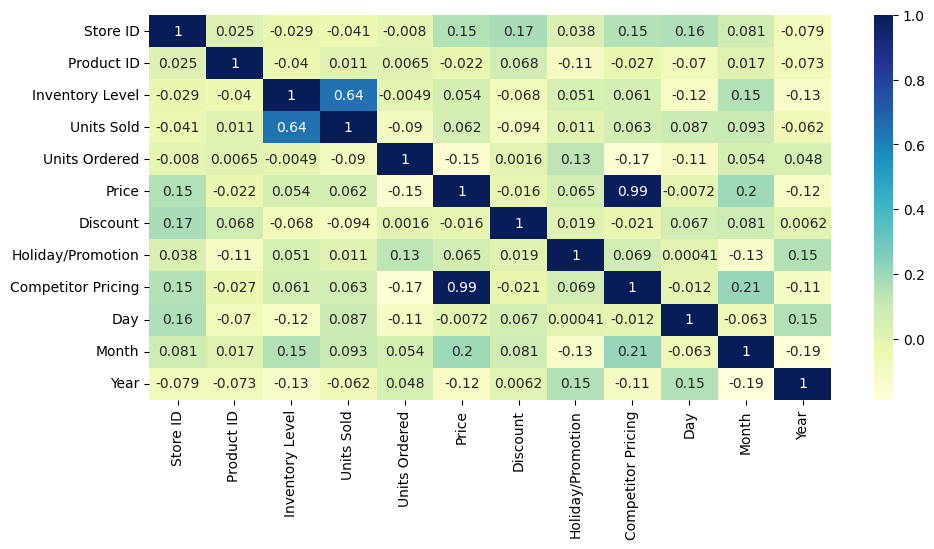

In [120]:
# Create the heatmap visualization for unit sales data (seed 42 for reproducability)
sample = numericalDataFrame.sample(n=100, random_state=42)

# Increase figure size to ensure heatmap values are legible
plt.figure(figsize=(11, 5))
sns.heatmap(sample.corr(), annot=True, cmap="YlGnBu")

In [121]:
# No clear relationship or significance with IDs or Date, so drop values
numericalDataFrame.drop(["Store ID", "Product ID", "Day", "Month", "Year"], axis=1, inplace=True)
numericalDataFrame

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing
0,231,127,55,33.50,20,0,29.69
1,204,150,66,63.01,20,0,66.16
2,102,65,51,27.99,10,1,31.32
3,469,61,164,32.72,10,1,34.74
4,166,14,135,73.64,0,0,68.95
...,...,...,...,...,...,...,...
73095,96,8,127,73.73,20,0,72.45
73096,313,51,101,82.57,10,0,83.78
73097,278,36,151,11.11,10,0,10.91
73098,374,264,21,53.14,20,0,55.80


In [122]:
# [x] represents the independent variables (features) of the dataset
# [y] represents the dependent variable (target) to be predicted from [x]
x = numericalDataFrame.drop("Units Sold", axis=1, inplace=False)
y = numericalDataFrame["Units Sold"]

# Split the data into training and testing sets with 80% (first 54,480 rows) training 20% (last 14,620 rows) testing
# [random_state] is a seed to ensure reproducible results
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [123]:
# Define the linear regression model (NON-DESCRIPTIVE METHOD)
model = linear_model.LinearRegression()

# Build the model using the training data split in module above
model.fit(xTrain, yTrain)

LinearRegression()

In [124]:
# Apply the trained model to create demand forecast (on the test set)
yPred = model.predict(xTest)

In [125]:
# Merge test dataframe with demand forecast and original units sold from original dataframe
df_forecast = xTest.copy()
df_forecast.insert(2, "Units Sold", numericalDataFrame["Units Sold"])
df_forecast["Demand Forecast"] = yPred
df_forecast

,Inventory Level,Units Ordered,Units Sold,Price,Discount,Holiday/Promotion,Competitor Pricing,Demand Forecast
66127,225,144,138,40.47,0,1,41.97,111.834986
43485,200,119,105,18.65,15,1,16.65,100.125401
34304,145,137,70,20.33,15,0,18.04,73.315483
34317,350,157,105,98.65,15,0,95.43,173.684014
38631,145,145,76,10.04,20,0,13.01,73.349316
...,...,...,...,...,...,...,...,...
8251,76,100,58,69.41,0,1,70.42,37.741430
50745,469,93,346,72.55,0,0,76.66,232.829090
50634,405,194,346,39.94,5,1,39.48,200.978338
23941,492,79,225,43.33,5,0,47.54,244.752876


In [126]:
# Print model performance on test data
# Coefficients represent the weight of the feature variables on the target variable
# Intercept represents the predicted value of target variable when feature variables are 0
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(yTest, yPred))
print("Coefficient of Determination (R-Squared): %.2f" % r2_score(yTest, yPred))

Coefficients:  [ 0.49540385 -0.00305166  0.0141909   0.01174048 -0.50861016 -0.02893988]
Intercept:  1.9574692625265584
Mean Squared Error (MSE): 7749.48
Coefficient of Determination (R-Squared): 0.35


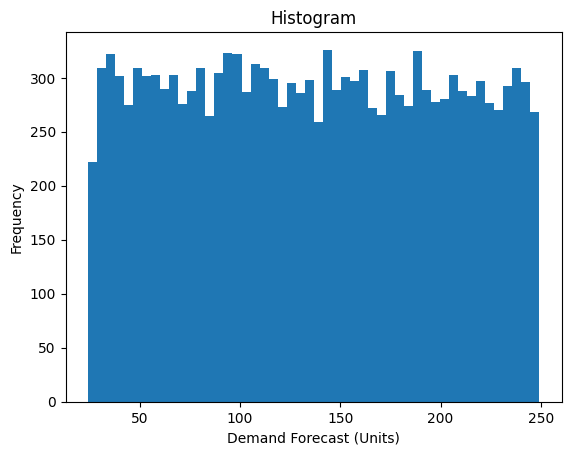

In [127]:
# Create a histogram visualization for demand forecast
plt.hist(df_forecast["Demand Forecast"], bins=50)
plt.xlabel("Demand Forecast (Units)")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

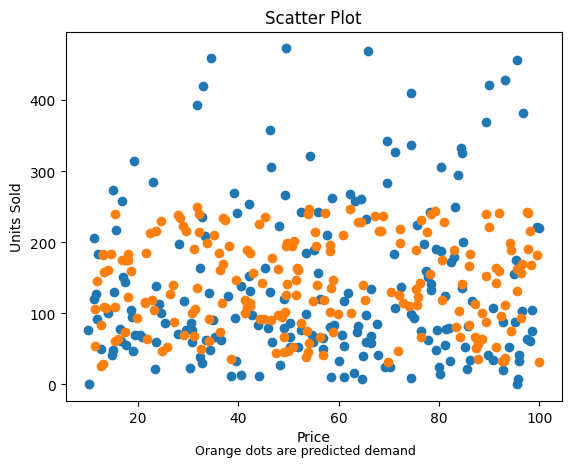

In [128]:
# Create a scatterplot visualization for analyzing forecasted demand to units sold (seed 42 for reproducability)
x = dataFrame["Price"].sample(n=200, random_state=42)
y = dataFrame["Units Sold"].sample(n=200, random_state=42)

plt.scatter(x, y)

x = xTest["Price"].sample(n=200, random_state=42)
y = np.random.choice(yPred, size=200)
plt.scatter(x, y)

# Add labels and title
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.title('Scatter Plot')
plt.figtext(0.5, 0, "Orange dots are predicted demand", ha="center", fontsize=9)

# Display the plot
plt.show()

<Axes: >

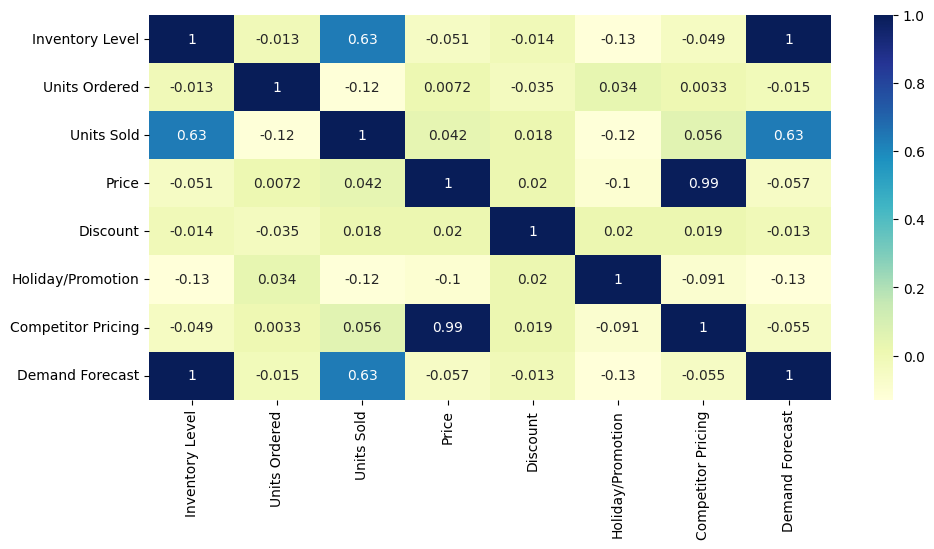

In [129]:
# Create the heatmap visualization for analyzing test forecast (seed 42 for reproducability)
sample = df_forecast.sample(n=100, random_state=42)

# Increase figure size to ensure heatmap values are legible
plt.figure(figsize=(11, 5))
sns.heatmap(sample.corr(), annot=True, cmap="YlGnBu")

In [130]:
import ipywidgets as widgets
from ipywidgets import Output, Layout, Box
from IPython.display import display, HTML

# The style convention for the text box description sizes
style = {"description_width": "180px"}

# The text boxes where the user can input values to create demand forecast
inventoryLevel_widget = widgets.FloatText(description="Inventory Level (Integer)", style=style, value="0")
unitsOrdered_widget = widgets.FloatText(description="Units Ordered (Integer)", style=style, value="0")
price_widget = widgets.FloatText(description="Price (Float)", style=style, value="0")
discount_widget = widgets.FloatText(description="Discount (Integer Percentage)", style=style, value="0")
holidayPromotion_widget = widgets.FloatText(description="Holiday/Promotion (0 or 1)", style=style, value="0")
compPricing_widget = widgets.FloatText(description="Competitor Pricing (Float)", style=style, value="0")

# A button for the user to get predictions using input valus and a widget to handle output 
forecast_button = widgets.Button(description="Forecast", layout=Layout(justify_content="center"))
output = widgets.Output()

# Labels for header and footer instructions
header_label = widgets.Label("Enter inventory details to create a forecast")
footer_label = widgets.Label(value='Enter values and press the \"Forecast\" button.')

# Bold the header and footer using CSS styling
header_label.add_class("bold-label")
footer_label.add_class("bold-label")
display(HTML("<style>.bold-label { font-weight: bold; }</style>"))

# Create list of vBox contens to enhance readability
vb_contents_list = [header_label,
                    inventoryLevel_widget,
                    unitsOrdered_widget,
                    price_widget,
                    discount_widget,
                    holidayPromotion_widget,
                    compPricing_widget,
                    footer_label]

# Displays the text boxes and buttons inside a VBox with these features
box_layout = Layout(display="flex",
                    flex_flow="column",
                    align_items="center",
                    width="50%")

# Display widgets for instructions, form fill out, and output
vb=widgets.VBox(vb_contents_list, layout=box_layout)
display(vb)

output_vb=widgets.VBox([forecast_button, output], layout=box_layout)
display(output_vb)

# Defines what happens when you click the [Forecast] button
# Displays demand forecast plus 3 visualizations
out = "hi"
@output.capture()
def on_click_forecast(b):
    # Apply the model to create demand forecast
    data = {"Inventory Level": [int(inventoryLevel_widget.value)],
            "Units Ordered": [int(unitsOrdered_widget.value)],
            "Price": [float(price_widget.value)],
            "Discount": [int(discount_widget.value)],
            "Holiday/Promotion": [int(holidayPromotion_widget.value)],
            "Competitor Pricing": [float(compPricing_widget.value)]}
    # Create DataFrame from dictionary of data
    df = pd.DataFrame(data)
    forecast = model.predict(df)
    with output:
        output.clear_output()
        print("Forecast = "+ str(int(forecast[0])) + " Units Sold")

forecast_button.on_click(on_click_forecast)